# Starbucks Capstone Challenge - Exploratory Data Analysis

## Setup

In [1]:
!pip install -e ../

Obtaining file:///C:/Users/netxph/Projects/sb-capstone
  Attempting uninstall: sb-capstone
    Found existing installation: sb-capstone 0.1.0
    Uninstalling sb-capstone-0.1.0:
      Successfully uninstalled sb-capstone-0.1.0
  Running setup.py develop for sb-capstone


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sb_capstone.wrangling import (
    clean_portfolio, 
    clean_profile, 
    clean_transcript,
    ChannelType
)

In [3]:
portfolio = pd.read_csv("../data/processed/portfolio.csv")
portfolio = clean_portfolio(portfolio)
portfolio.head()

,id,offer_type,channels,reward,difficulty,duration
0,1,bogo,"[email, mobile, social]",10,10,7
1,2,bogo,"[web, email, mobile, social]",10,10,5
2,3,informational,"[web, email, mobile]",0,0,4
3,4,bogo,"[web, email, mobile]",5,5,7
4,5,discount,"[web, email]",5,20,10


In [4]:
profile = pd.read_csv("../data/processed/profile.csv")
profile = clean_profile(profile)
profile.head()

,id,gender,age,income,became_member_on
0,1,NaN,NaN,NaN,2017-02-12
1,2,F,55.0,112000.0,2017-07-15
2,3,NaN,NaN,NaN,2018-07-12
3,4,F,75.0,100000.0,2017-05-09
4,5,NaN,NaN,NaN,2017-08-04


In [5]:
transcript = pd.read_csv("../data/processed/transcript.csv")
transcript = clean_transcript(transcript)
transcript.head()

,person_id,event,time,offer_id,amount,reward
0,4,offer_received,0,4,NaN,NaN
1,4,offer_viewed,6,4,NaN,NaN
2,4,transaction,132,0,19.89,NaN
3,4,offer_completed,132,4,NaN,5.0
4,4,transaction,144,0,17.78,NaN


## Data Analysis

* Descriptive
* Missing Values
* Duplicates

### Understand Portfolio Table

In [6]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          10 non-null     int64   
 1   offer_type  10 non-null     category
 2   channels    10 non-null     object  
 3   reward      10 non-null     int64   
 4   difficulty  10 non-null     int64   
 5   duration    10 non-null     int64   
dtypes: category(1), int64(4), object(1)
memory usage: 670.0+ bytes


In [7]:
portfolio.sort_values(by=["duration", "difficulty", "reward"], ascending=False)

,id,offer_type,channels,reward,difficulty,duration
4,5,discount,"[web, email]",5,20,10
6,7,discount,"[web, email, mobile, social]",2,10,10
0,1,bogo,"[email, mobile, social]",10,10,7
9,10,discount,"[web, email, mobile]",2,10,7
5,6,discount,"[web, email, mobile, social]",3,7,7
3,4,bogo,"[web, email, mobile]",5,5,7
1,2,bogo,"[web, email, mobile, social]",10,10,5
8,9,bogo,"[web, email, mobile, social]",5,5,5
2,3,informational,"[web, email, mobile]",0,0,4
7,8,informational,"[email, mobile, social]",0,0,3


In [8]:
portfolio.describe(include="all")

,id,offer_type,channels,reward,difficulty,duration
count,10.00000,10,10,10.000000,10.000000,10.000000
unique,NaN,3,4,NaN,NaN,NaN
top,NaN,bogo,"[web, email, mobile, social]",NaN,NaN,NaN
freq,NaN,4,4,NaN,NaN,NaN
mean,5.50000,NaN,NaN,4.200000,7.700000,6.500000
std,3.02765,NaN,NaN,3.583915,5.831905,2.321398
min,1.00000,NaN,NaN,0.000000,0.000000,3.000000
25%,3.25000,NaN,NaN,2.000000,5.000000,5.000000
50%,5.50000,NaN,NaN,4.000000,8.500000,7.000000
75%,7.75000,NaN,NaN,5.000000,10.000000,7.000000


In [9]:
portfolio.offer_type.value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

In [10]:
portfolio.channels.explode().astype(ChannelType).value_counts()

email     10
mobile     9
web        8
social     6
Name: channels, dtype: int64

In [11]:
portfolio.explode(column="channels").groupby("id").channels.count()

id
1     3
2     4
3     3
4     3
5     2
6     4
7     4
8     3
9     4
10    3
Name: channels, dtype: int64

In [12]:
portfolio.reward / portfolio.difficulty

0    1.000000
1    1.000000
2         NaN
3    1.000000
4    0.250000
5    0.428571
6    0.200000
7         NaN
8    1.000000
9    0.200000
dtype: float64

**NOTES**

* Portfolio has only 10 items describing the different promotions offered.
* Different combinations of BOGO offers playing at varying durations and rewards/difficulty.
* BOGO rewards and difficulty are always the same. Does make sense, when they buy with a certain difficulty, it will have same reward.
* Varying discount percentage as well (most of them are around ~20% discount)
* Low reward/difficulty has the more durations
* Informational has no rewards or difficulty, but maybe something "new"
* No noticeable difference or patterns on channels

**QUESTIONS**

* Are the duration extended because it's effective, or because, since it has low rewards (loss), we can extend it further?
* Which promotion technique is most effecient "profit-wise"?
* Is the informational offer can be efficient?

### Understand Profile Table

In [13]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                17000 non-null  int64         
 1   gender            14825 non-null  category      
 2   age               14825 non-null  float64       
 3   income            14825 non-null  float64       
 4   became_member_on  17000 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(2), int64(1)
memory usage: 548.1 KB


In [14]:
profile.describe(include="all", datetime_is_numeric=True)

,id,gender,age,income,became_member_on
count,17000.000000,14825,14825.000000,14825.000000,17000
unique,NaN,3,NaN,NaN,NaN
top,NaN,M,NaN,NaN,NaN
freq,NaN,8484,NaN,NaN,NaN
mean,8500.500000,NaN,54.393524,65404.991568,2017-02-23 13:12:10.164706048
min,1.000000,NaN,18.000000,30000.000000,2013-07-29 00:00:00
25%,4250.750000,NaN,42.000000,49000.000000,2016-05-26 00:00:00
50%,8500.500000,NaN,55.000000,64000.000000,2017-08-02 00:00:00
75%,12750.250000,NaN,66.000000,80000.000000,2017-12-30 00:00:00
max,17000.000000,NaN,101.000000,120000.000000,2018-07-26 00:00:00


In [15]:
profile.gender.value_counts(normalize=True)

M    0.572277
F    0.413423
O    0.014300
Name: gender, dtype: float64

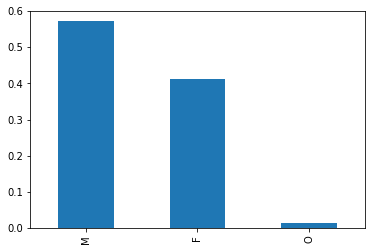

In [16]:
profile.gender.value_counts(normalize=True).plot(kind="bar");

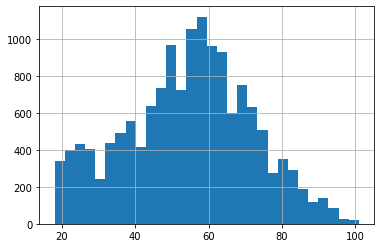

In [17]:
profile.age.hist(bins=30);

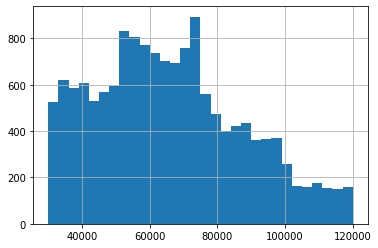

In [18]:
profile.income.hist(bins=30);

In [19]:
profile.became_member_on.dt.year.value_counts(normalize=True)

2017    0.380529
2018    0.246941
2016    0.207412
2015    0.107647
2014    0.040647
2013    0.016824
Name: became_member_on, dtype: float64

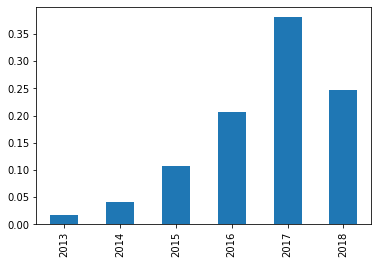

In [20]:
profile.became_member_on.dt.year.value_counts(normalize=True).sort_index(axis=0).plot(kind="bar");

In [21]:
profile.became_member_on.dt.month.value_counts(normalize=True)

8     0.094706
10    0.092235
12    0.091529
1     0.089706
9     0.089118
11    0.085235
7     0.079941
3     0.078176
4     0.077353
5     0.076882
6     0.074412
2     0.070706
Name: became_member_on, dtype: float64

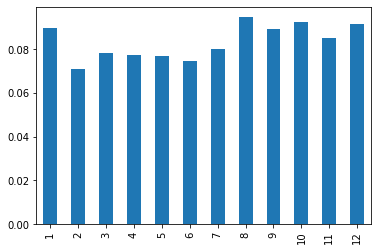

In [22]:
profile.became_member_on.dt.month.value_counts(normalize=True).sort_index(axis=0).plot(kind="bar");

In [23]:
null_profiles = profile[profile.gender.isna() & profile.age.isna() & profile.income.isna()][["id", "gender", "became_member_on"]]
len(null_profiles)

2175

In [24]:
null_profiles.describe(datetime_is_numeric=True)

,id,became_member_on
count,2175.000000,2175
mean,8517.805517,2017-03-29 19:53:42.620689920
min,1.000000,2013-08-02 00:00:00
25%,4006.500000,2016-07-04 12:00:00
50%,8542.000000,2017-07-31 00:00:00
75%,12855.000000,2017-12-26 00:00:00
max,16995.000000,2018-07-26 00:00:00
std,4985.473324,NaN


**NOTES**

* The missing values are the same, no age, income, and gender, just the membership date
* 2175 missing values
* Membership dates from early 2013 to mid 2018. Around 5 years. The null profiles has the same range as well.
* Mostly male (57%), but not so much difference with female (41%) number. Around 1 percent are unspecified.
* Age from 18 to 101 years old, averaging at 54 years old. Has normal distribution.
* Salary range from 30000 to 120000, distribution is right skewed, showing dip around 75000
* Most joiners are during 2017 (38%), and we've seen membership growth trends which only dip in 2018.
* New joiners are distributed almost equally on different months.

**QUESTIONS**

* Is it safe to delete the profiles with missing values? Does the transcript has use for these missing data?
* Who are these null profiles? Anonymous buyers?
* Will having a profile can help us better predict offers?
* How does gender, age, income affects membership joining?


In [25]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   person_id  306534 non-null  int64   
 1   event      306534 non-null  category
 2   time       306534 non-null  int64   
 3   offer_id   306534 non-null  int64   
 4   amount     138953 non-null  float64 
 5   reward     33579 non-null   float64 
dtypes: category(1), float64(2), int64(3)
memory usage: 12.0 MB


In [26]:
transcript.describe(include="all")

,person_id,event,time,offer_id,amount,reward
count,306534.000000,306534,306534.000000,306534.000000,138953.000000,33579.000000
unique,NaN,4,NaN,NaN,NaN,NaN
top,NaN,transaction,NaN,NaN,NaN,NaN
freq,NaN,138953,NaN,NaN,NaN,NaN
mean,8501.102374,NaN,366.382940,3.034450,12.777356,4.904137
std,4901.913992,NaN,200.326314,3.491083,30.250529,2.886647
min,1.000000,NaN,0.000000,0.000000,0.050000,2.000000
25%,4265.000000,NaN,186.000000,0.000000,2.780000,2.000000
50%,8499.000000,NaN,408.000000,1.000000,8.890000,5.000000
75%,12731.000000,NaN,528.000000,6.000000,18.070000,5.000000


> NOTES

> Before we can tuoch the nulls, we need to understand how promo works for every event

In [27]:
transcript.event.value_counts()

transaction        138953
offer_received      76277
offer_viewed        57725
offer_completed     33579
Name: event, dtype: int64

In [28]:
transcript[transcript.event == "offer_received"].head()

,person_id,event,time,offer_id,amount,reward
0,4,offer_received,0,4,NaN,NaN
5,4,offer_received,168,8,NaN,NaN
10,4,offer_received,408,1,NaN,NaN
12,4,offer_received,504,9,NaN,NaN
18,5,offer_received,0,5,NaN,NaN


In [29]:
transcript[transcript.event == "offer_viewed"].head()

,person_id,event,time,offer_id,amount,reward
1,4,offer_viewed,6,4,NaN,NaN
6,4,offer_viewed,216,8,NaN,NaN
11,4,offer_viewed,408,1,NaN,NaN
17,4,offer_viewed,582,9,NaN,NaN
19,5,offer_viewed,6,5,NaN,NaN


In [30]:
transcript[transcript.event == "transaction"].head()

,person_id,event,time,offer_id,amount,reward
2,4,transaction,132,0,19.89,NaN
4,4,transaction,144,0,17.78,NaN
7,4,transaction,222,0,19.67,NaN
8,4,transaction,240,0,29.72,NaN
9,4,transaction,378,0,23.93,NaN


In [31]:
transcript[(transcript.event == "transaction") & (transcript.offer_id != 0)].head()

,person_id,event,time,offer_id,amount,reward


In [32]:
transcript[transcript.event == "offer_completed"].head()

,person_id,event,time,offer_id,amount,reward
3,4,offer_completed,132,4,NaN,5.0
14,4,offer_completed,510,1,NaN,10.0
15,4,offer_completed,510,9,NaN,5.0
39,6,offer_completed,522,4,NaN,5.0
40,6,offer_completed,522,7,NaN,2.0


In [33]:
transcript[transcript.person_id == 4].sort_values("time")

,person_id,event,time,offer_id,amount,reward
0,4,offer_received,0,4,NaN,NaN
1,4,offer_viewed,6,4,NaN,NaN
2,4,transaction,132,0,19.89,NaN
3,4,offer_completed,132,4,NaN,5.0
4,4,transaction,144,0,17.78,NaN
5,4,offer_received,168,8,NaN,NaN
6,4,offer_viewed,216,8,NaN,NaN
7,4,transaction,222,0,19.67,NaN
8,4,transaction,240,0,29.72,NaN
9,4,transaction,378,0,23.93,NaN


> NOTES

> Combine transcript with portfolio to understand more the flow